## MATH 152 Lab 7


MATH 152 Lab 7
Section Number: 571

Members:

- Brighton Sikarskie
- Alex Krakora
- Joseph Pham
- Diego Mendez


In [1]:
from sympy import *
from sympy.plotting import plot, plot_parametric
import matplotlib.pyplot as plt
import numpy as np


### Question 1


#### 1a


In [2]:
# find the partial sum s10 of the series 1/n^4 = pi^4/90
# estimate error in using s1- as an approximation to the sum of the series

n = symbols("n")
s10 = summation(1 / n ** 4, (n, 1, 10))
eulers_estimate = pi ** 4 / 90
eulers_estimate_diff = (eulers_estimate - s10).evalf()
print(f"The partial sum s10 of the series 1/n^4 = pi^4/90 is {s10} which is {s10.evalf()}")
print(f"The error in using s10 as an approximation to the sum of the series is {eulers_estimate_diff}")


The partial sum s10 of the series 1/n^4 = pi^4/90 is 43635917056897/40327580160000 which is 1.08203658349376
The error in using s10 as an approximation to the sum of the series is 0.000286650217381645


#### 1b


In [3]:
# use n = 10 to give an improved estimate
# sn + integral from n+1 to infinity of f(x) <= s <= sn + integral from n to infinity of f(x)

s10 = summation(1 / n ** 4, (n, 1, 10))
lower_bound = s10 + integrate(1 / n ** 4, (n, 11, oo))
upper_bound = s10 + integrate(1 / n ** 4, (n, 10, oo))
print(f"The improved estimate of the sum of the series is {lower_bound.evalf()} <= s <= {upper_bound.evalf()}")


The improved estimate of the sum of the series is 1.08228702176072 <= s <= 1.08236991682709


#### 1c


In [4]:
print("Comparing the improved estimate to eulers estimate we see the following:")
print(f"eulers estimate: {eulers_estimate.evalf()}")
print(f"improved estimate lower bound: {lower_bound.evalf()}")
print(f"improved estimate upper bound: {upper_bound.evalf()}")
print(f"improved estimate upper bound - eulers estimate: {upper_bound.evalf() - eulers_estimate.evalf()}")
print(f"eulers estimate - improved estimate lower bound: {eulers_estimate.evalf() - lower_bound.evalf()}")
print(f"improved estimate average: {(upper_bound.evalf() + lower_bound.evalf())/2}")
print(
    f"improved estimate average - eulers estimate: {(upper_bound.evalf() + lower_bound.evalf())/2 - eulers_estimate.evalf()}"
)


Comparing the improved estimate to eulers estimate we see the following:
eulers estimate: 1.08232323371114
improved estimate lower bound: 1.08228702176072
improved estimate upper bound: 1.08236991682709
improved estimate upper bound - eulers estimate: 0.0000466831159517955
eulers estimate - improved estimate lower bound: 0.0000362119504144776
improved estimate average: 1.08232846929391
improved estimate average - eulers estimate: 0.00000523558276865899


#### 1d


In [5]:
# find the value of n so that sn is within 10E-6 of the sum of the series


def find_n():
    x = 2
    while True:
        s = summation(1 / n ** 4, (n, 1, x))
        if abs(s - eulers_estimate) < 10e-6:
            return x
        x += 1


n = find_n()
print(f"The value of n so that sn is within 10E-6 of the sum of the series is {n}")


The value of n so that sn is within 10E-6 of the sum of the series is 32


### Question 2


#### 2a


In [6]:
x = symbols("x")
fx = x ** 2 * (exp(-x))
a = integrate(fx, x)
a2 = integrate(fx, (x, 2, oo))
print(a)
print(a2)


(-x**2 - 2*x - 2)*exp(-x)
10*exp(-2)


#### 2b


In [7]:
print("the series converges because the integral converges")


the series converges because the integral converges


#### 2c


In [8]:
m = ""
s_n = Sum(fx, (x, 2, x))
print("s10=", s_n.subs(x, 11).doit())
print("s50=", s_n.subs(x, 51).doit())
print("s100=", s_n.subs(x, 101).doit())

print("s=", Sum(fx, (x, 2, oo)).doit())

print("The 100th partial sum is 1.62441532595355")
print("The 10th partial sum is 1.62286764121492")
print("The 50th partial sum is 1.62441532595355")


s10= 121*exp(-11) + 100*exp(-10) + 81*exp(-9) + 64*exp(-8) + 49*exp(-7) + 36*exp(-6) + 25*exp(-5) + 16*exp(-4) + 9*exp(-3) + 4*exp(-2)
s50= 2601*exp(-51) + 2500*exp(-50) + 2401*exp(-49) + 2304*exp(-48) + 2209*exp(-47) + 2116*exp(-46) + 2025*exp(-45) + 1936*exp(-44) + 1849*exp(-43) + 1764*exp(-42) + 1681*exp(-41) + 1600*exp(-40) + 1521*exp(-39) + 1444*exp(-38) + 1369*exp(-37) + 1296*exp(-36) + 1225*exp(-35) + 1156*exp(-34) + 1089*exp(-33) + 1024*exp(-32) + 961*exp(-31) + 900*exp(-30) + 841*exp(-29) + 784*exp(-28) + 729*exp(-27) + 676*exp(-26) + 625*exp(-25) + 576*exp(-24) + 529*exp(-23) + 484*exp(-22) + 441*exp(-21) + 400*exp(-20) + 361*exp(-19) + 324*exp(-18) + 289*exp(-17) + 256*exp(-16) + 225*exp(-15) + 196*exp(-14) + 169*exp(-13) + 144*exp(-12) + 121*exp(-11) + 100*exp(-10) + 81*exp(-9) + 64*exp(-8) + 49*exp(-7) + 36*exp(-6) + 25*exp(-5) + 16*exp(-4) + 9*exp(-3) + 4*exp(-2)
s100= 10201*exp(-101) + 10000*exp(-100) + 9801*exp(-99) + 9604*exp(-98) + 9409*exp(-97) + 9216*exp(-96) + 9025

#### 2d


In [9]:
a = Sum(fx, (x, 2, oo)).doit() - s_n.subs(x, 101).doit()
print("actual value:", a, " which is ", a.evalf())

a = Sum(fx, (x, 2, oo)).doit() - s_n.subs(x, 101).doit()
print("Lower estimate:", a, " which is ", a.evalf())

a = 1 / 101 + Sum(fx, (x, 2, oo)).doit() - s_n.subs(x, 101).doit()
print("Higher estimate:", a, " which is ", a.evalf())

print("It does fall between those two numbers")


actual value: -4*exp(-2) - 9*exp(-3) - 16*exp(-4) - 25*exp(-5) - 36*exp(-6) - 49*exp(-7) - 64*exp(-8) - 81*exp(-9) - 100*exp(-10) - 121*exp(-11) - 144*exp(-12) - 169*exp(-13) - 196*exp(-14) - 225*exp(-15) - 256*exp(-16) - 289*exp(-17) - 324*exp(-18) - 361*exp(-19) - 400*exp(-20) - 441*exp(-21) - 484*exp(-22) - 529*exp(-23) - 576*exp(-24) - 625*exp(-25) - 676*exp(-26) - 729*exp(-27) - 784*exp(-28) - 841*exp(-29) - 900*exp(-30) - 961*exp(-31) - 1024*exp(-32) - 1089*exp(-33) - 1156*exp(-34) - 1225*exp(-35) - 1296*exp(-36) - 1369*exp(-37) - 1444*exp(-38) - 1521*exp(-39) - 1600*exp(-40) - 1681*exp(-41) - 1764*exp(-42) - 1849*exp(-43) - 1936*exp(-44) - 2025*exp(-45) - 2116*exp(-46) - 2209*exp(-47) - 2304*exp(-48) - 2401*exp(-49) - 2500*exp(-50) - 2601*exp(-51) - 2704*exp(-52) - 2809*exp(-53) - 2916*exp(-54) - 3025*exp(-55) - 3136*exp(-56) - 3249*exp(-57) - 3364*exp(-58) - 3481*exp(-59) - 3600*exp(-60) - 3721*exp(-61) - 3844*exp(-62) - 3969*exp(-63) - 4096*exp(-64) - 4225*exp(-65) - 4356*exp(

#### 2e


In [10]:
"""
According to the Remainder Estimate, how many terms are needed to sum the series to
within 10e-10? Compute the sum to confirm |s - sN | < 10e-10. 
"""
import math

sN = 0
for n in range(1, 28):
    sN += n**2 * math.exp(-n)

s = sum(n**2 * math.exp(-n) for n in range(1, 1000000))

print("sN =", sN)
print("s  =", s)
print("|s - sN| =", abs(s - sN))



sN = 1.9922947662303887
s  = 1.9922947671249875
|s - sN| = 8.945988394515325e-10


### Question 3


#### 3a


In [11]:
from math import sin, exp, inf
def a(n):
    return (n * sin(n) ** 2) / (1 + n ** 3)


def b(n):
    return 1 / n ** 2


n_max = 100000
sum_a = sum(a(n) for n in range(1, n_max + 1))
sum_b = sum(b(n) for n in range(1, n_max + 1))

print("sum n=1 to infinity a_n =", sum_a)
print("sum n=1 to infinity b_n =", sum_b)


sum n=1 to infinity a_n = 0.6927822232724179
sum n=1 to infinity b_n = 1.6449240668982423


#### 3b


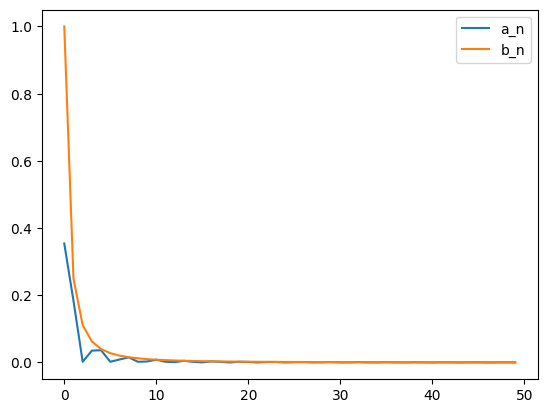

In [12]:
import matplotlib.pyplot as plt


def a(n):
    return (n * sin(n) ** 2) / (1 + n ** 3)


def b(n):
    return 1 / n ** 2


n_max = 50
a_values = [a(n) for n in range(1, n_max + 1)]
b_values = [b(n) for n in range(1, n_max + 1)]

plt.plot(a_values, label="a_n")
plt.plot(b_values, label="b_n")
plt.legend()
plt.show()


#### 3c


In [13]:
def a(n):
    return (n * sin(n) ** 2) / (1 + n ** 3)


def ratio_test(a, n):
    return abs(a(n + 1) / a(n))


n = 1
while ratio_test(a, n) < 1:
    n += 1

print(f"The series converges for n >= {n}")


The series converges for n >= 3


#### 3d


In [14]:
from scipy.integrate import quad


def a(n):
    return (n * sin(n) ** 2) / (1 + n ** 3)


def integrand(x):
    return (x * sin(x) ** 2) / (1 + x ** 3)


def integral_test(a, n):
    I, error = quad(integrand, n, inf)
    return I / a(n)


n = 1
while integral_test(a, n) < 1:
    n += 1

print(f"The series converges for n >= {n}")


The series converges for n >= 1


/tmp/ipykernel_528478/4102961144.py:13: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  I, error = quad(integrand, n, inf)


### Question 3 (part 2)


#### 3a.2


In [15]:
def a(n):
    try:
        return (exp(n) + 1) / (n * exp(n) + 1)
    except:
        return 0


def b(n):
    return 1 / n


n_max = 100000
sum_a = sum(a(n) for n in range(1, n_max + 1))
sum_b = sum(b(n) for n in range(1, n_max + 1))

print("sum n=1 to infinity a_n =", sum_a)
print("sum n=1 to infinity b_n =", sum_b)


sum n=1 to infinity a_n = 7.180862255762959
sum n=1 to infinity b_n = 12.090146129863335


#### 3b.2


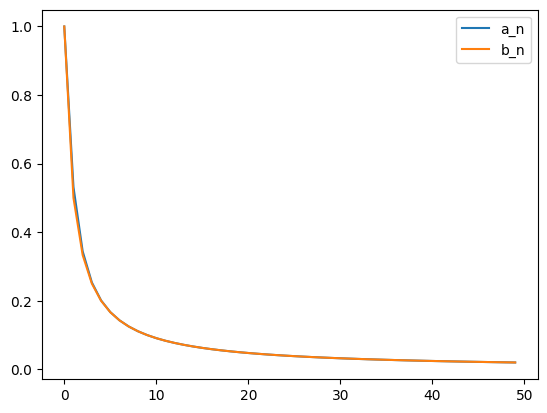

In [16]:
def a(n):
    return (exp(n) + 1) / (n * exp(n) + 1)


def b(n):
    return 1 / n


n_max = 50
a_values = [a(n) for n in range(1, n_max + 1)]
b_values = [b(n) for n in range(1, n_max + 1)]

plt.plot(a_values, label="a_n")
plt.plot(b_values, label="b_n")
plt.legend()
plt.show()


#### 3c.2


In [1]:
def a(n):
    try:
        return (exp(n) + 1) / (n * exp(n) + 1)
    except:
        return 0

def ratio_test(a, n):
    try:
        return abs(a(n + 1) / a(n))
    except:
        return 1


n = 1
while ratio_test(a, n) < 1:
    n += 1

print(f"The series converges for n >= {n}")


The series converges for n >= 1


#### 3d.2


In [ ]:
def a(n):
    try:
        return (exp(n) + 1) / (n * exp(n) + 1)
    except:
        return 0


def b(n):
    return 1 / n


def integrand(n):
    try:
        return (exp(n) + 1) / (n * exp(n) + 1)
    except:
        return 0


def integral_test(a, n):
    I, error = quad(integrand, n, oo)
    return I / a(n)


n = 1
while integral_test(a, n) < 1:
    n += 1

print(f"The series converges for n >= {n}")


The series converges for n >= 1
